# Importing necessary libraries and downloading necessary packages

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# model training
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preparing the Data

##Loading the Expected Personality Requirement

In [31]:
# connecting to google drive

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Intellihire

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Intellihire


In [32]:
# # Load the CSV file into a Pandas DataFrame

df = pd.read_csv('Personality_Requirements.csv')

In [33]:
# df = pd.DataFrame({
#     'Position of Interest': 'Associate Software Engineer',
#     'Innovative': [5],
#     'Fast learner': [4],
#     'Organization skills': [3],
#     'Attention to detail': [4],
#     'Assertiveness':  [2],
#     'Leadership skills':  [2],
#     'Team Player':  [5],
#     'Communication skills':  [3],
#     'Confidence':  [3],
#     'Adaptability to changes':  [4] 
# })

In [34]:
# print the data  without the first column

# data = (df.iloc[:, 1:])
data = (df.iloc[1, 1:])
print(data)

Innovative                 3
Fast learner               2
Organization skills        5
Attention to detail        2
Assertiveness              4
Leadership skills          5
Team Player                5
Communication skills       5
Confidence                 4
Adaptability to changes    3
Name: 1, dtype: object


##Mapping the Expected Personality Requirements with the Big Five Traits

In [35]:
# OPENNESS:
# Fast learner	
# Innovative

# CONCIENTIOUSSNESS:
# Attention to Detail
# Organization skills	

# EXTRAVERSION:
# Communication skills	
# Team Player	

# AGREEABLENESS:
# Interpersonal Skills	
# Analytical and Problem Solving Skills	

# NEUROTICISM:
# Adaptability to changes	
# Confidence

In [36]:
# create an empty dataframe to hold the final expected values for the Big Five traits 
expected = pd.DataFrame()

In [37]:
# Map the personality requirements with Big Five Traits

expected['openness'] = [(data['Fast learner'] + data['Innovative'])/2]
expected['conscientiousness'] = [(data['Attention to detail'] + data['Organization skills'])/2]
expected['extraversion'] = [(data['Assertiveness'] + data['Leadership skills'])/2]
expected['agreeableness'] = [(data['Team Player'] + data['Communication skills'])/2]
expected['neuroticism'] = [(data['Confidence'] + data['Adaptability to changes'])/2]

# Show the updated DataFrame
print(expected)

   openness  conscientiousness  extraversion  agreeableness  neuroticism
0       2.5                3.5           4.5            5.0          3.5


##Loading the Candidate Personality

In [38]:
# Load the CSV file containing candidate score for mcq questions
mcq_scores = pd.read_csv('mcq_scores.csv')
mcq_scores

,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,3.4,3.3,2.9,3.2,2.6


In [39]:
# Load the CSV file containing candidate score for open-ended questions
open_ended_scores = pd.read_csv('candidate_scores.csv')
open_ended_scores

,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,2.857143,2.5,1.666667,3.5,1.666667


In [40]:
# Combining the 2 scores to get a final score for the candidate's Big Five Traits
candidate_scores = pd.DataFrame()
candidate_scores['openness'] = (mcq_scores['openness'] + open_ended_scores['openness'])/2
candidate_scores['conscientiousness'] = (mcq_scores['conscientiousness'] + open_ended_scores['conscientiousness'])/2
candidate_scores['extraversion'] = (mcq_scores['extraversion'] + open_ended_scores['extraversion'])/2
candidate_scores['agreeableness'] = (mcq_scores['agreeableness'] + open_ended_scores['agreeableness'])/2
candidate_scores['neuroticism'] = (mcq_scores['neuroticism'] + open_ended_scores['neuroticism'])/2

In [41]:
candidate_scores

,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,3.128571,2.9,2.283333,3.35,2.133333


# Expected vs Candidate Traits

##Plotting the Expected Personality Traits

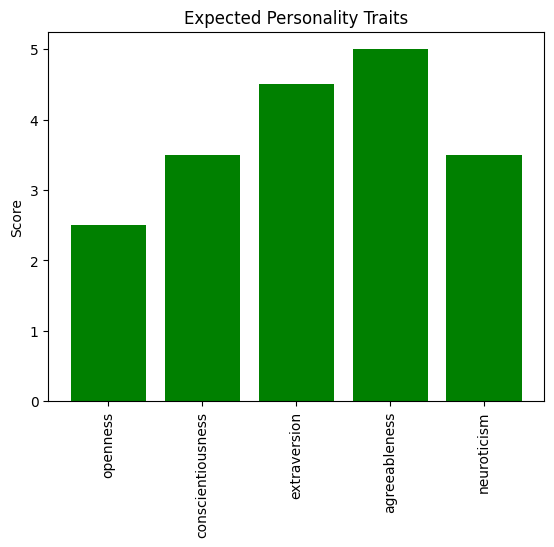

In [42]:
# Create a vertical bar plot
plt.bar(x=expected.columns, height=expected.values[0], color='green')

# Set the y-axis label
plt.ylabel('Score')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Add a title to the plot
plt.title('Expected Personality Traits')

# Show the plot
plt.show()

##Plotting the Candididate Personality Traits

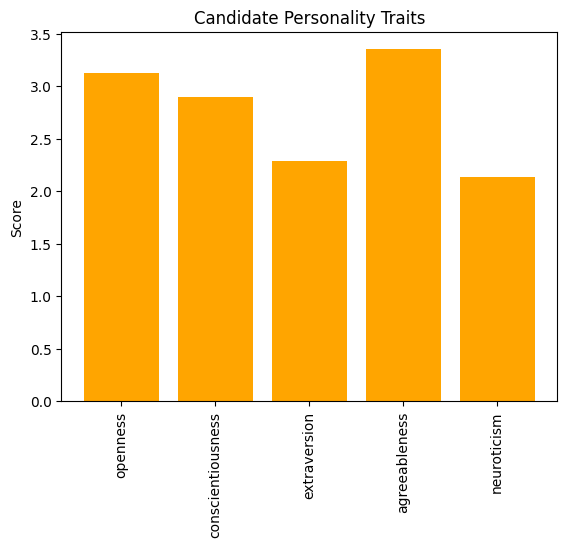

In [43]:
# Create a vertical bar plot
plt.bar(x=candidate_scores.columns, height=candidate_scores.values[0], color='orange')

# Set the y-axis label
plt.ylabel('Score')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Add a title to the plot
plt.title('Candidate Personality Traits')

# Show the plot
plt.show()

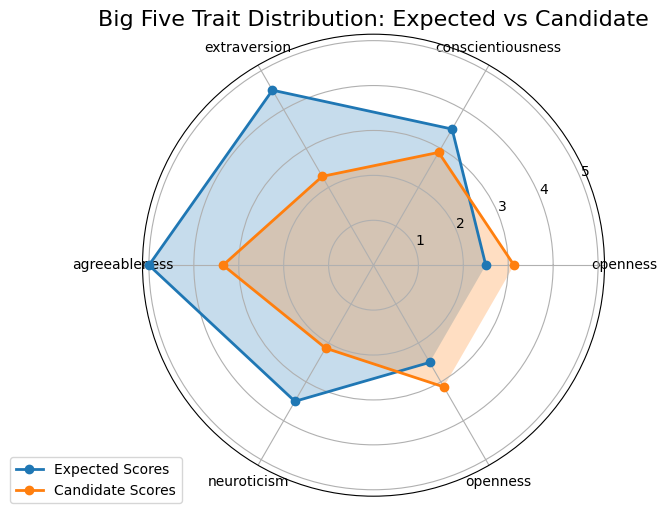

In [44]:
# Create a list of column names for the data frames
columns = list(expected.columns)

# Add the first column name to the end of the list to create a closed loop for the radar chart
columns.append(columns[0])

# Get the values of the data frames as arrays
values1 = np.array(expected.iloc[0])
values2 = np.array(candidate_scores.iloc[0])

# Add the first value to the end of the array to create a closed loop for the radar chart
values1 = np.append(values1, values1[0])
values2 = np.append(values2, values2[0])

# Set the angle values for the radar chart
angles = np.linspace(0, 2 * np.pi, len(columns), endpoint=False)

# Create a radar chart for the first data frame
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values1, 'o-', linewidth=2, label="Expected Scores")
ax.fill(angles, values1, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, columns)
ax.set_title("Big Five Trait Distribution: Expected vs Candidate", fontsize=16)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
ax.grid(True)

# Create a radar chart for the second data frame
ax.plot(angles, values2, 'o-', linewidth=2, label="Candidate Scores")
ax.fill(angles, values2, alpha=0.25)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the radar chart
plt.show()


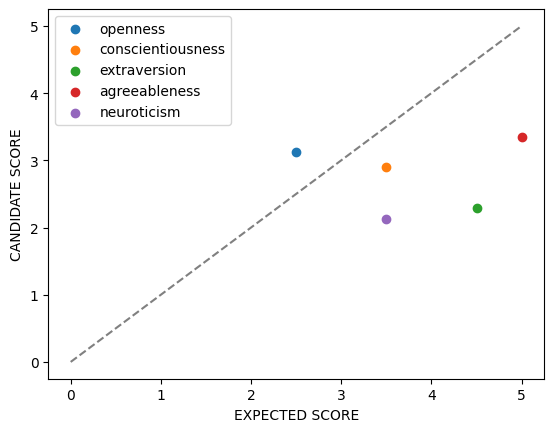

In [45]:
import matplotlib.pyplot as plt

# Extract the column names from the data frames
columns = candidate_scores.columns

# Create a scatter plot for each column
for col in columns:
    plt.scatter(expected[col], candidate_scores[col], label=col)

# Add a horizontal line at the middle of the plot
plt.plot([0, 5], [0, 5], linestyle='--', color='grey')

# Add labels and legend  
plt.xlabel('EXPECTED SCORE')
plt.ylabel('CANDIDATE SCORE')
plt.legend()

# Display the plot
plt.show()


# Supervised Learning Models to Predict Personality Cluster

In [46]:
# load the dataset created from K-means model
clusters_df = pd.read_csv('Personality_clusters.csv')

In [47]:
clusters_df

,openness,conscientiousness,extraversion,agreeableness,neuroticism,cluster
0,3.3,3.2,3.0,3.1,2.4,1
1,2.7,3.1,3.4,3.2,2.1,1
2,3.1,2.8,2.9,2.8,2.6,1
3,3.1,2.7,2.6,3.2,2.7,1
4,3.6,3.2,3.5,3.0,2.3,1
...,...,...,...,...,...,...
1013476,2.9,3.1,3.2,3.6,3.3,4
1013477,3.3,2.8,3.4,3.3,4.0,3
1013478,3.6,3.3,3.3,3.5,2.7,2
1013479,3.5,3.0,2.8,3.1,3.3,4


##Splitting Data into Training and Testing

In [48]:
X = clusters_df[['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']]
y = clusters_df['cluster']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##RandomForest Model

In [49]:
# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Predict cluster labels for the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9910556150313029


**Accuracy is too high - Overfitting**

## XGBoost Model

In [50]:
# Convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

num_classes = len(clusters_df['cluster'].unique())

# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': num_classes,
    'seed': 42
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain)

# Predict cluster labels for the test data
y_pred = xgb_model.predict(dtest)

# Convert the predicted labels to integers
y_pred = y_pred.astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9538769690720632


##Naive-Bayes

In [51]:
# Instantiate the Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the model to the training data
nb_classifier.fit(X_train, y_train)

# Predict cluster labels for the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9573155991455227


##Save the Cross Validated XGBoost model

In [52]:
# Save the trained model to a pickle file
filename = 'xgboost_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(xgb_model, file)


##Predict the Personality Clusters

##Load the saved XGBoost model

In [53]:
# Load the saved XGBoost model from the pickle file
filename = 'xgboost_model.pkl'
with open(filename, 'rb') as file:
    xgb_model = pickle.load(file)

In [54]:
# predict the personality cluster for Candidate's personality

# Convert the candidate_scores DataFrame to DMatrix format
dnew = xgb.DMatrix(candidate_scores)

# Make predictions using the XGBoost model
predictions = xgb_model.predict(dnew)

print("Candidate Personality Cluster:", predictions)

Candidate Personality Cluster: [1.]


In [55]:
# predict the personality cluster for Candidate's personality

# Convert the candidate_scores DataFrame to DMatrix format
dnew = xgb.DMatrix(expected)

# Make predictions using the XGBoost model
predictions = xgb_model.predict(dnew)

print("Candidate Personality Cluster:", predictions)

Candidate Personality Cluster: [3.]


# Score for Expected vs Candidate Traits

In [56]:
# Score = ((OE/OC + CC/CE + EC/EE + AC/AE + NC/NE)/5)*100

In [57]:
# Add a new column with the sum of 'Fast learner' and 'Innovative'

O = candidate_scores['openness']/expected['openness']
C = candidate_scores['conscientiousness']/expected['conscientiousness']
E = candidate_scores['extraversion']/expected['extraversion']
A = candidate_scores['agreeableness']/expected['agreeableness']
N = 1 - (candidate_scores['neuroticism']/expected['neuroticism'])

# print('O: ', O)
# print('C: ', C)
# print('E: ', E)
# print('A', A)
# print('N', N)

score = ((O + C + E + A + N)/5)*100

# Show the updated DataFrame
print('Candidate personality score: ', score)

Candidate personality score:  0    72.957672
dtype: float64
